<div style="border:solid green 2px; padding: 20px">
<b>Нияз, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Критическая ошибка: ❌</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Хорошо, но можно и лучше: ❗️</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Все отлично: ✅</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться в концепции / деталях работы. 

</div>

### Откройте файл с данными и изучите общую информацию. 

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

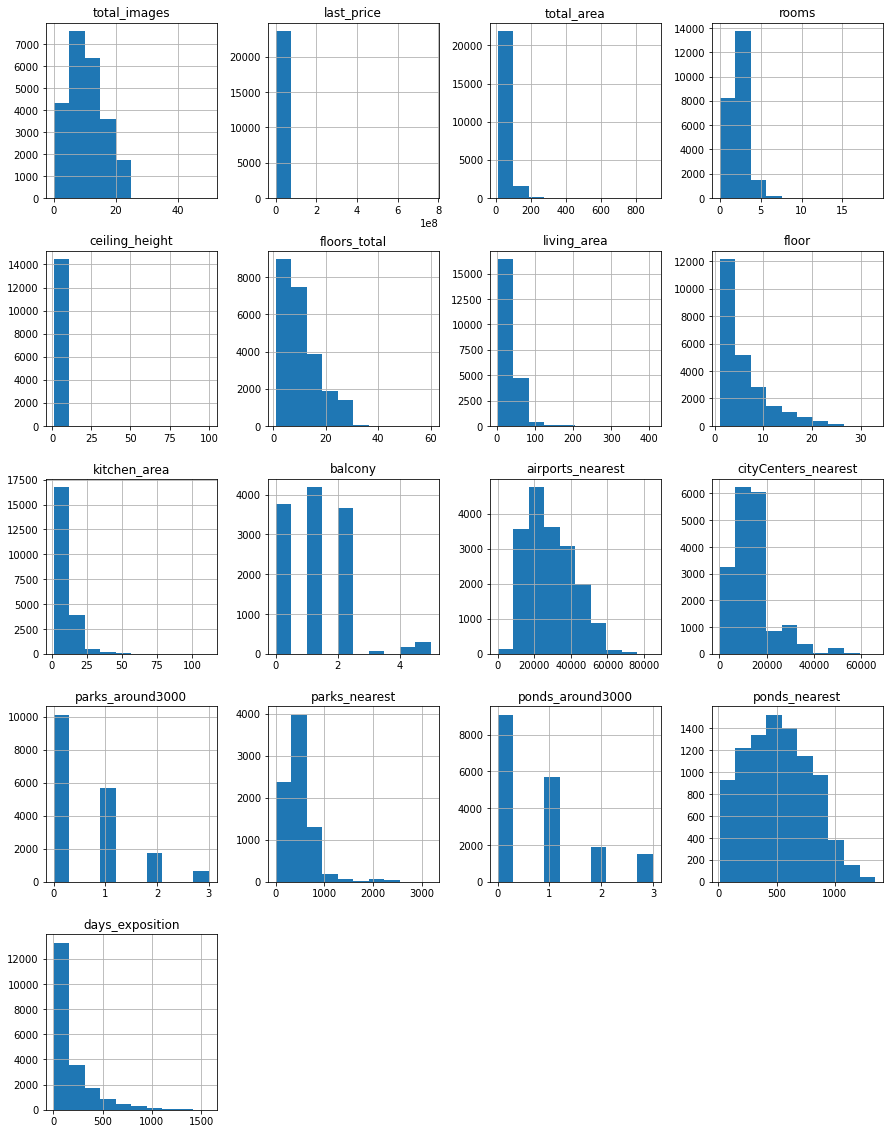

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from math import isnan
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data.head())
data.hist(figsize=(15, 20))
plt.show()

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Рекомендую не применять метод `print()` для вывода таблиц. Лучше импортировать в
начале проекта метод `display` из библиотеки `IPython.display` и
применять его:

---
    
`from IPython.display import display`

`display(df)`

    
</div>

Столбцы были разделены при помощи \t, поэтому я изменил аргумент sep на \t. Построил общую гистограмму для всех данных. Видно что данные нуждаются в обработке.

### Предобработка данных

In [6]:
print(data.isna().sum())
data['is_apartment'] = data['is_apartment'].fillna('False')
data['balcony'] = data['balcony'].fillna(0.0)
data.loc[(data['locality_name'].isna()) & ~(data['airports_nearest'].isna()), ['locality_name']] = 'Санкт-Петербург'
data = data.dropna(subset=['locality_name'])

#data.loc[(data['parks_nearest'].isna()) & (data['parks_around3000'].isna()), ['parks_nearest']] = 0
#data.loc[(data['ponds_nearest'].isna()) & (data['ponds_around3000'].isna()), ['ponds_nearest']] = 0
#заполнил пропуски чтобы посмотреть как они связаны
#вывод: таких пропусков, чтобы были парки или пруды в радиусе 3км, но при этом был пропуск в nearest нет.
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

data = data.dropna(subset=['floors_total'])

data['kitchen_area'] = data['kitchen_area'].fillna(0)
data['living_area'] = data['total_area'] - data['kitchen_area']
#print(data['living_area'].isna().sum())

data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('median'))
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('median'))

data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('locality_name')['ceiling_height'].transform('median'))

data['is_apartment'] = data.loc[data['is_apartment'] == 'False', ['is_apartment']] = False

# print(data['locality_name'].info())
data['locality_name'] = data['locality_name'].astype('string')

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])


def duplicates_killer(string):
    string = string.split()
    result = list()
    for i in range(len(string)):
        if string[i][0].islower():
            string[i] = ''
    for j in string:
        if len(j) != 0:
            result.append(j)
    result = ' '.join(result)
    return result


data['locality_name'] = data['locality_name'].apply(duplicates_killer)

def ceiling_norm(height):
    if 20 <= height <= 32:
        return height / 10
    elif 2 <= height <= 3.2:
        return height
    else:
        return None

data['ceiling_height'] = data['ceiling_height'].apply(ceiling_norm)    
data = data.dropna(subset=['ceiling_height'])

def floors_norm(floor):
    if floor > 36:
        return None
    else:
        return floor


data['floors_total'] = data['floors_total'].apply(floors_norm)
data = data.dropna(subset=['floors_total'])


def price_norm(price):
    if (276000000 < price) or (price < 490000):
        return None
    else:
        return price


data['last_price'] = data['last_price'].apply(price_norm)
data = data.dropna(subset=['last_price'])



total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

В том числе метод `fillna` и `astype` можно применять к нескольким столбцам одновременно.
    
Если столбцов более 2–ух, то рекомендую применять цикл `for`.
    
Пример: 
    
`df.astype({ "col1": "float64", "col2": "int64"})`
    
</div>

```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].fillna(0)

```

<div class="alert alert-success">
<b>Комментарий ревьюера: ❗️</b>

Рекомендую также оценивать доли пропусков по столбцам, таким образом мы сразу сможем понять где больше всего пропусков в нашем датафрейме.

</div>

Вывожу все столбцы с посчитаными в них пропусками. Выяснил природу пропусков в столбцах с парками и прудами. Не стал заполнять пропуски в nearest, т.к. это бы повлияло на графики. Отбросил объявления без количества этажей в доме, т.к. этих пропусков мало. Выяснил что пропуски в площади кухни связаны лишь с тем, что кухня объеденена с залом, поэтому я заполнил их нулём, а жилплощадь пересчитал для заполнения пропусков. Пропуски в картографических данных о ближайшем центре и аэропорте заполнил медианным значением сгруппировав по locality_name. Так же поступил и с потолками, что логично (схожая архитектура в одном городе). Пропуски в apartment заменил на false. Поменял тип данных locality_name на string, т.к. там был какой-то объект. First day exposition перевел в dt без часов, т.к. часы нам не важны. Удалил неявные дупликаты из locality отбросив тип поселения (деревня, посёлок и т.п.), оставив только название. Исследовал значения в высоте потолков и привёл их в порядок, лишнее отбросил. Также поступил с этажём и стоимостью.


### Посчитайте и добавьте в таблицу новые столбцы

In [7]:
import math

In [8]:
data['price_per_metre'] = data['last_price'] / (data['total_area'])

data['day_sale'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month_sale'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_sale'] = pd.DatetimeIndex(data['first_day_exposition']).year

data['floors_norm'] = data['floors_total'] - data['floor']
data.loc[data['floor'] == data['floors_total'], ['floors_norm']] = 'last'
data.loc[data['floor'] <= 1, ['floors_norm']] = 'first'
data.loc[(data['floor'] > 1) & (data['floor'] != data['floors_total']), ['floors_norm']] = 'else'

def distance_norm(distance):
    if math.isnan(distance):
        return distance
    else:
        return round(distance / 1000)


data['cityCenters_nearest'] = data['cityCenters_nearest'].apply(distance_norm)
data['airports_nearest'] = data['airports_nearest'].apply(distance_norm)

print('median =', data['days_exposition'].median())
print('mean =', data['days_exposition'].mean())

# data.boxplot(column=['days_exposition'])
# plt.show()

median = 93.0
mean = 178.27709559569718


Вставил столбцы о стоимости кв. метра, дате продажи и этаже. Перевёл в километры расстояние до центра и аэропорта. Посчитал среднее и медианное время продажи, построил ящик с усами. Можно сказать, что данные, выходящие за третий квартиль являются долгими (продажа), а данные ниже первого квартиля - быстрые.

<div class="alert alert-danger">
<b>Комментарий ревьюера: ❌</b>

<s>Упс, здесь что-то сломалось. 
    
Посмотри пожалуйста в чем дело.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Я писал всё в pycharm, поэтому библиотека math импортирована в начале. Мне нужен был метод isnan из этой библиотеки для того чтобы проверить данные - являются они NaN или нет, т.к. метод round не может обработать такое значение и бросает ошибку. См. функция distance_norm.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>
    

Проблема как раз в том, что эта библиотека не импортирована. Добавил импорт, чтобы все отработало.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Мы достаточно детально обработали наши данные и добавили все необходимые значения в нашу выборку. Давай теперь проведём анализ.
    
</div>

### Проведите исследовательский анализ данных

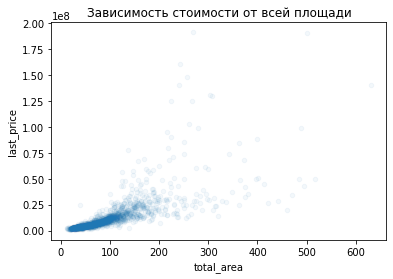

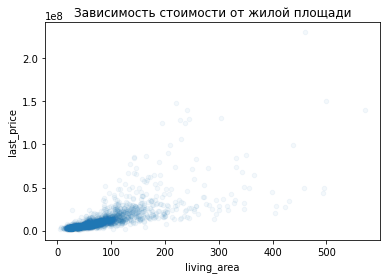

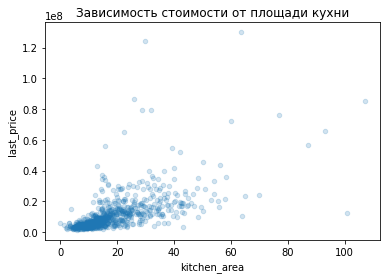

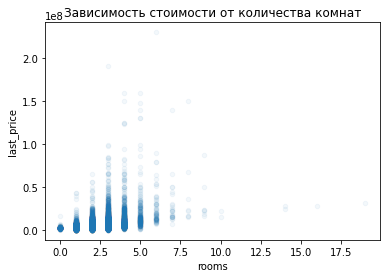

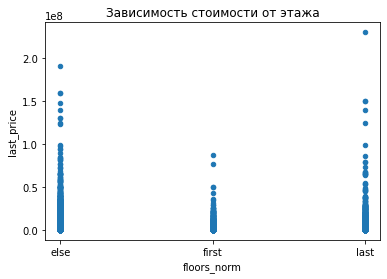

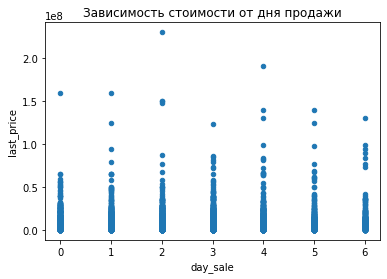

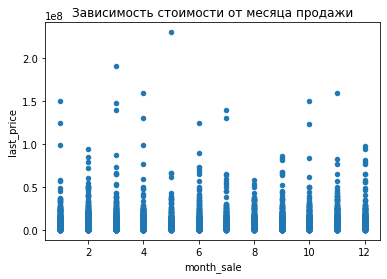

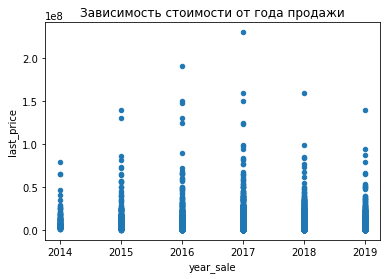

[57875.44876565685, 'Выборг'] [112749.14269941262, 'Санкт-Петербург']


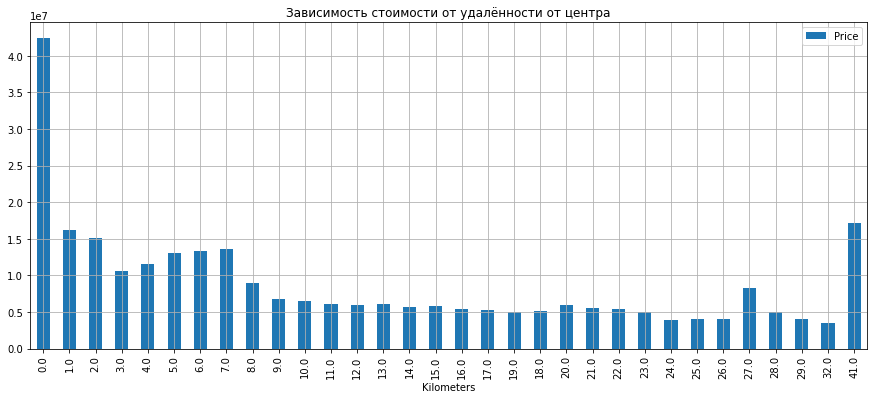

In [23]:
total_area = pd.pivot_table(data, values='last_price', index='total_area')
total_area = total_area.reset_index()

total_area.plot(x='total_area', y='last_price', kind='scatter', alpha=0.05, title="Зависимость стоимости от всей площади")
plt.show()

living_area = pd.pivot_table(data, values='last_price', index='living_area')
living_area = living_area.reset_index()

living_area.plot(x='living_area', y='last_price', kind='scatter', alpha=0.05, title="Зависимость стоимости от жилой площади")
plt.show()

kitchen_area = pd.pivot_table(data, values='last_price', index='kitchen_area')
kitchen_area = kitchen_area.reset_index()

kitchen_area.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.2, title="Зависимость стоимости от площади кухни")
plt.show()

data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.05, title="Зависимость стоимости от количества комнат")
plt.show()

data.plot(x='floors_norm', y='last_price', kind='scatter', alpha=1, title="Зависимость стоимости от этажа")
#plt.show()

data.plot(x='day_sale', y='last_price', kind='scatter', alpha=1, title="Зависимость стоимости от дня продажи")
plt.show()

data.plot(x='month_sale', y='last_price', kind='scatter', alpha=1, title="Зависимость стоимости от месяца продажи")
plt.show()

data.plot(x='year_sale', y='last_price', kind='scatter', alpha=1, title="Зависимость стоимости от года продажи")
plt.show()

indexes = data['locality_name'].value_counts().head(10).index

list_top_ten = list()
for i in indexes:
    list_top_ten.append([data.loc[data['locality_name'] == i, ['price_per_metre']].mean().values[0], i])
print(min(list_top_ten), max(list_top_ten))

price_kilometer = (data.loc[data['locality_name'] == 'Санкт-Петербург', ['cityCenters_nearest', 'last_price']])
total_price = list()
for i in data['cityCenters_nearest'].unique():
    total_price.append([i, price_kilometer.loc[price_kilometer['cityCenters_nearest'] == i, ['last_price']].mean().values[0]])
price_kilometer_df = pd.DataFrame(sorted(total_price), columns=["Kilometers", "Price"])
price_kilometer_df = price_kilometer_df.dropna(subset=['Price'])
price_kilometer_df.plot(x='Kilometers', y='Price', kind='bar', title="Зависимость стоимости от удалённости от центра", figsize=(15, 6), grid=True)
plt.show()

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

Не забывай пожалуйста подписавать каждый график. Это важный момент всего проект, потому что так быстрее понять о чем идёт речь на графике.

</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Лучше всего конечно не делать такие объемные ячейки с кодом.
    
Почему ? 
    
Это создает ряд неудобностей:
    
- код тяжелее и медлее изучать 
- возникают неудобства в коммуникации, будет не совсем удобно изучать мои комментарии и потом на них отвечать

Поэтому рекомендую делать методы в отдельных ячейках, если это например не одни и те же способы.
    
    
---
    
P.s. Помимо графиков рассеяния можно также было построить распределения для каждой переменной.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Кстати для того чтобы подписать график мы можем использовать метод `plt.title()` и в конце кода применить `plt.show()`
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>
    
Хорошие и логичные комментарии. Очень важно строить график корреляции между переменными, ведь может произойти такая ситуация, что расчет у нас очень сильный а на графике абсолютно другая картина.
    
---

В том числе можно было построить матрицу корреляции между нужными нам переменными.
    
И визуализировать её с помощью метода `heatmap` из библиотеки `seaborn`.
    
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера: ❌</b>

<s>Что, нам необходимо поправить: 
    
- Подписать каждый график и тем самым сделаем наш проект еще презентабельнее.
- Визуализировать информацию по удаленности от центра
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Поправил. Создал датафрейм из массива и по нему построил график. Небольшой рост к 6-7 км возможно как-то связан с местными достопримечательностями или набережной.</div>

Построил графики зависимостей. Посчитал топ 10 продаваемых locality. Посчитал самые где самые дешёвые, а где - самые дорогие квартиры. Посчитал стоимость "километров" в СПБ.
Выводы: чем больше площадь, тем больше стоимость. Однако квартиры, площадь которых больше 130 кв.м. имеют большой разброс в стоимости. Возможно это связано с тем, что данных с такими большими квартирами недостаточно, ну и в таких квартирах стоимость начинает большо зависеть от других факторов - какой ремонт, есть ли парковка, расстояние до центра и т.д.
Жил площадь и площадь кухни кореллирует с общей площадью, поэтому данные схожи. Корелляция кухонь отслеживается в целом, но данных мало, из-за большого числа кухонь совмещённых с залом.
Квартиры из 2 - 4 комнат наиболее популярны. За ними наблюдается зависимость - больше комнат, больше стоимость. Квартиры с большим числом комнат (5 и более) реже встречаются в объявлениях. Однако очевидно отслежтивается увеличение их входной стоимости - она растёт с числом комнат.
Расположении квартиры на определённом этаже так же влияет на стоимость: самые дешёвые на первом этаже, а на счёт дорогих понять нельзя, т.к. квартир с другим этажём больше чем квартир на последнем. Но скорее всего квартиры на последнем этаже показали бы большую стоимость, если бы данных было больше, т.к. и входное значение и самый верхний выброс выше.
В понедельник и четверг продаются квартиры подороже. Заметен рост стоимости от вторника к четвергу и падение от четверга к воскресенью.
Самые дешёвые квартиры продаются в апреле и июле. В январе, марте, мае, августе и ноябре - средняя стоимость, самая большая - в оставшихся месяцах.
В 2017 году продавались более дорогие квартиры, в 2014 более дешёвые. Видна связь с экономическим состоянием страны в те годы. Остальные года имеют среднее значение.
В среднем самые дорогие квадратные метры, очевидно, в Питере, а самые дешевые - в Выборге.
По километрам также очевидно - чем дальше от центра тем дешевле.

### Общий вывод

Данные нуждались в обработке. Есть пропуски, которые трудно обработать, возможно стоит ввести новые обозначения на агрегаторе объявлений: совмещённая кухня, отсутствие парков (возможно выставлять автоматически). То есть сделать некоторые пункты обязательными при создании объявления.
Квартиры продаются в среднем полгода, медианно - один сезон.
Чем больше площадь, тем больше стоимость. Однако квартиры, площадь которых больше 130 кв.м. имеют большой разброс в стоимости. Возможно это связано с тем, что данных с такими большими квартирами недостаточно, ну и в таких квартирах стоимость начинает большо зависеть от других факторов - какой ремонт, есть ли парковка, расстояние до центра и т.д.
Жил площадь и площадь кухни кореллирует с общей площадью, поэтому данные схожи. Корелляция кухонь отслеживается в целом, но данных мало, из-за большого числа кухонь совмещённых с залом.
Квартиры из 2 - 4 комнат наиболее популярны. За ними наблюдается зависимость - больше комнат, больше стоимость. Квартиры с большим числом комнат (5 и более) реже встречаются в объявлениях. Однако очевидно отслежтивается увеличение их входной стоимости - она растёт с числом комнат.
Расположении квартиры на определённом этаже так же влияет на стоимость: самые дешёвые на первом этаже, а на счёт дорогих понять нельзя, т.к. квартир с другим этажём больше чем квартир на последнем. Но скорее всего квартиры на последнем этаже показали бы большую стоимость, если бы данных было больше, т.к. и входное значение и самый верхний выброс выше.
В понедельник и четверг продаются квартиры подороже. Заметен рост стоимости от вторника к четвергу и падение от четверга к воскресенью.
Самые дешёвые квартиры продаются в апреле и июле. В январе, марте, мае, августе и ноябре - средняя стоимость, самая большая - в оставшихся месяцах.
В 2017 году продавались более дорогие квартиры, в 2014 более дешёвые. Видна связь с экономическим состоянием страны в те годы. Остальные года имеют среднее значение.
В среднем самые дорогие квадратные метры, очевидно, в Питере, а самые дешевые - в Выборге.
По километрам также очевидно - чем дальше от центра тем дешевле.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>


    
Достаточно детально проделанная работа и это не может не радовать 😊
    
Давай поправим мои комментарии и будем двигаться дальше.
    
Если у тебя вдруг есть какие–либо вопросы, то я с радостью отвечу на них 😊
       

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
    
**[общий комментарий]** Ячейки **markdown** в том числе мы можем использовать как дополнительный способ стилизации нашего проекта. Оставил ниже ссылку, с примерами стилизации.

https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet
    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод